In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv('Height-Weight Data.csv')

In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [6]:
df.head(7)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889


In [8]:
df.Height.head(3)

0    73.847017
1    68.781904
2    74.110105
Name: Height, dtype: float64

In [9]:
df['Weight'].head(3)

0    241.893563
1    162.310473
2    212.740856
Name: Weight, dtype: float64

In [10]:
df[5:6]

,Height,Weight
5,67.253016,152.212156


In [11]:
df[5:10]

,Height,Weight
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [12]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [14]:
df.Height.mean()

69.02441087268797

In [15]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [16]:
df.Height.std()

2.8585833281420983

In [17]:
df.shape

(3501, 2)

In [18]:
row,col=df.shape

In [19]:
row

3501

In [20]:
col

2

In [21]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Visualization

Text(0.5, 1.0, 'Height-Weight Plot')

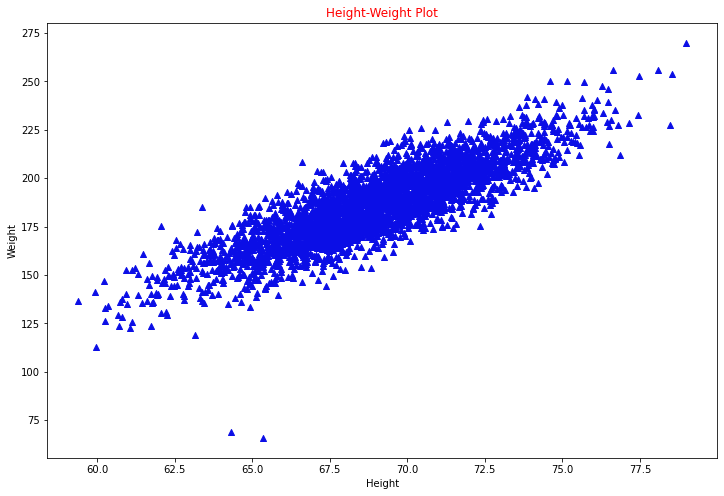

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height,df.Weight,marker='^',color='#0B0EE6')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Plot',color='Red')

In [24]:
x=df['Height']#single Dimention not allowed
y=['Weight']

In [25]:
x.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [26]:
x=df[['Height']]
y=df['Weight']

In [27]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


# Split the Dataset into train test

In [28]:
from sklearn.model_selection import train_test_split as tts

In [29]:
#train 70% ; test 30%
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.30)

In [30]:
xtrain.head()

,Height
1169,65.642584
525,68.624063
2689,67.378518
3103,70.664700
1005,72.548852


In [31]:
ytrain.head()

1169    162.685521
525     159.862467
2689    170.001348
3103    201.802789
1005    203.627584
Name: Weight, dtype: float64

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg=LinearRegression()

In [34]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [35]:
m=reg.coef_
m

array([5.92360781])

In [36]:
c=reg.intercept_
c

-221.97911949384758

In [37]:
x1=65.642584
y=m*x1+c

In [38]:
y

array([166.86180392])

In [39]:
reg.predict([[65.642584]])

array([166.86180392])

In [40]:
pred=reg.predict(xtest)

In [41]:
pred

array([201.24603511, 215.27427586, 203.26414077, ..., 202.18421274,
       203.54008534, 205.02592397])

In [42]:
df['predicted result']=reg.predict(x)

In [43]:
df.head()

,Height,Weight,predicted result
0,73.847017,241.893563,215.461647
1,68.781904,162.310473,185.457905
2,74.110105,212.740856,217.020080
3,71.730978,220.042470,202.927065
4,69.881796,206.349801,191.973232


In [44]:
x1=73.847017
y=m*x1+c
y

array([215.46164734])

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
mse=mean_squared_error(ytest,pred)

In [47]:
mse

109.24388393608629

In [48]:
mae=mean_absolute_error(ytest,pred)

In [49]:
mae

8.23525001515426

# Best Fit Line

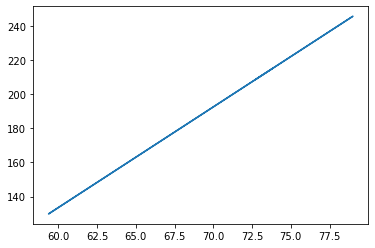

In [50]:
plt.plot(df.Height,reg.predict(df[['Height']]))

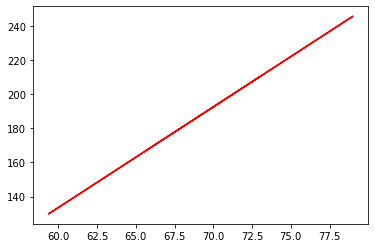

In [51]:
plt.plot(xtrain,reg.predict(xtrain),color='red')

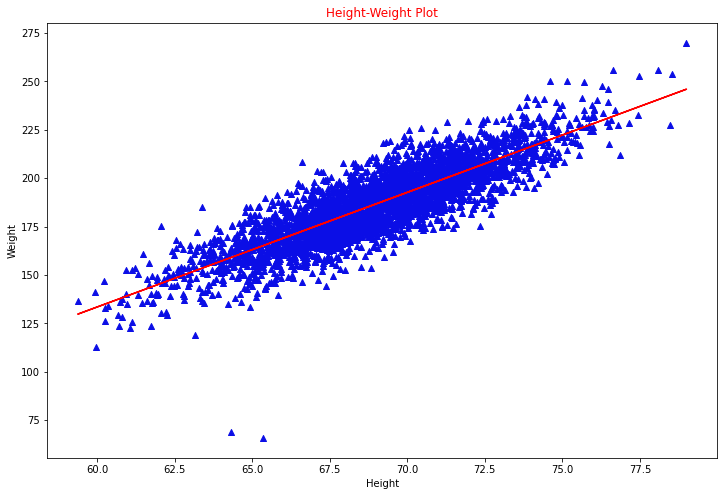

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height,df.Weight,marker='^',color='#0B0EE6')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Plot',color='Red')
plt.plot(xtrain,reg.predict(xtrain),color='red')

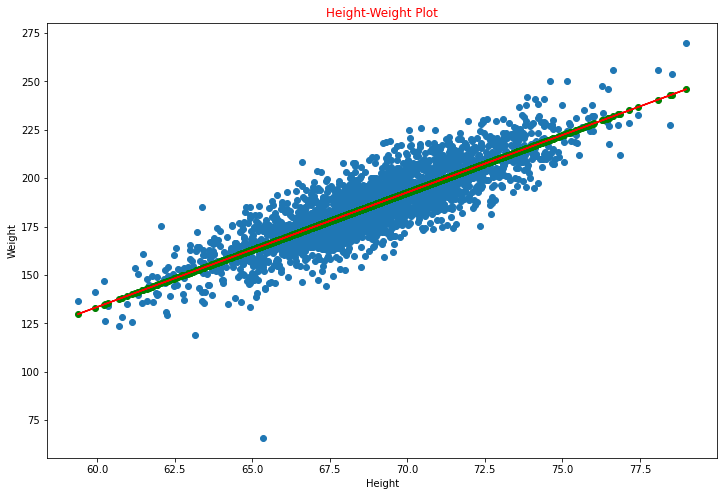

In [54]:
plt.figure(figsize=(12,8))
plt.xlabel('Height',color='black')
plt.ylabel('Weight')
plt.title('Height-Weight Plot',color='Red')
plt.plot(xtrain,reg.predict(xtrain),color='red')
plt.scatter(xtrain,ytrain)
plt.scatter(xtrain,reg.predict(xtrain),color='green')

In [55]:
import warnings
warnings.filterwarnings('ignore')
reg.predict([[74.110105]])

array([217.02007747])

In [56]:
reg.score(xtest,ytest)

0.7380356753899389

In [57]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.7380356753899389